# Table of Contents

1. [Import & Set Up](#import_everything)
2. [Load in data](#load_files)
3. [Within Pair Correlation](#within_pair_correlation)
3. [Center of Mass](#c_o_m)
    1. [distance apart](#distance_apart)
    2. [error by overlap](#error_by_overlap)
4. [Face Associate Task](#face_task)

# Import Stuff
<a id='import_everything'></a>


note - need to change so that when you sweep through with loop.py, it names the subfolders appropriately. This happens currently with chanales, were it's labeled with overlap type. will want to do something like that here so it's labeled as same vs different

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



import seaborn as sns
import matplotlib.animation as animation
import os as os
from collections import defaultdict
import shutil
import glob
import sys
from statsmodels.stats.anova import AnovaRM


# sns.set_style(style='white')
# pd.set_option('display.max_columns', 500)

colors_dict = {'Same': sns.color_palette("GnBu")[3], 
              'Different': sns.color_palette("GnBu")[1]}

color_order_dict = {'first': sns.color_palette('husl')[0],
             'second': sns.color_palette('husl')[3]}

### Set directory

In [2]:
print('Number of arguments:', len(sys.argv), 'arguments.')
print('Argument List:', str(sys.argv))
print('---')
from_cmdLine = sys.argv[-1]
print(from_cmdLine)

print('---')

if from_cmdLine == 'cmd' :
    data_file = sys.argv[-2]
    print('using command line to set data')
    data_dir = data_file + '/'
else :
    print('using script to set data')
#     data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/color_diff/data/2021_03_30_test_t4/subject0/'
    data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/favila/data/same_diff2/'
    data_dir = '/Users/victoria/go/src/github.com/emer/leabra/examples/favila/data/2022_01_01_favila/'
    data_dir = './figs/test/'

results_dir = data_dir + '/results/'
if not os.path.exists(results_dir) :
    os.mkdir(results_dir)
unusedfigs_dir = data_dir + '/unusedfigs/'
if not os.path.exists(unusedfigs_dir) :
    os.mkdir(unusedfigs_dir)   
    
eps_dir = results_dir + 'eps_files/'

if not os.path.exists(eps_dir):
    os.mkdir(eps_dir)

Number of arguments: 3 arguments.
Argument List: ['/usr/people/qanguyen/anaconda3/envs/leabra/lib/python3.8/site-packages/ipykernel_launcher.py', '-f', '/mnt/cup/people/qanguyen/.local/share/jupyter/runtime/kernel-de5ad413-4925-4244-9b33-366a8664e057.json']
---
/mnt/cup/people/qanguyen/.local/share/jupyter/runtime/kernel-de5ad413-4925-4244-9b33-366a8664e057.json
---
using script to set data


# Load in files
<a id='load_files'></a>

In [3]:
curr_dirs = []
# overlap = np.arange(6)
overlap = ['Same' , 'Different']
for o in overlap :
    o = str(o)
    curr_d =  'results_--same_diff_flag=' + o + '/'
    print(curr_d)
    curr_dirs.append(curr_d)
    
all_c_mass_list = []
all_face_list = []

all_corr_list = []

all_corr_pre_post_list = []
for d in curr_dirs :
    all_c_mass_list.append(pd.read_csv(data_dir + d + 'fig/results/center_of_mass.csv', index_col = 0))
    
    all_corr_list.append(pd.read_csv(data_dir + d + 'fig/results/correlation.csv', index_col = 0))
#     all_face_list.append(pd.read_csv(data_dir + d + 'fig/results/face_data.csv', index_col = 0))

    all_corr_pre_post_list.append(pd.read_csv(data_dir + d + 'fig/results/pre_post_corr.csv', index_col = 0))
    # move MDS plots
    mds_glob = glob.glob(data_dir + d + 'fig/results/*_hidden_data_MDS_rotated_by_run*')
    
    for source in mds_glob:
        shutil.copy(source, results_dir + f"Fig 8b: {source.split('/')[-1]}")
all_c_mass_df = pd.concat(all_c_mass_list, 0)
all_c_mass_df['overlap'] = all_c_mass_df['overlap'].astype('category')
all_c_mass_df['layer'] = all_c_mass_df['layer'].astype('category')
all_c_mass_df['order'] = all_c_mass_df['order'].astype('category')

all_corr_df = pd.concat(all_corr_list, 0)
all_corr_df['layer'] = all_corr_df['layer'].astype('category')

all_corr_df['same_diff_condition'] = all_corr_df['same_diff_condition'].astype('category')

all_corr_pre_post_df = pd.concat(all_corr_pre_post_list, 0)

# all_face_df = pd.concat(all_face_list,0)
# all_face_df['overlap'] = all_face_df['overlap'].astype('category')
# all_face_df['unit'] = all_face_df['unit'].astype('category')

results_--same_diff_flag=Same/
results_--same_diff_flag=Different/


In [4]:
hidden_c_mass_df = all_c_mass_df[all_c_mass_df['layer']=='hidden'].reset_index()
output_c_mass_df = all_c_mass_df[all_c_mass_df['layer']=='output'].reset_index()
output_c_mass_df['time']= output_c_mass_df['time'].map({'pre':'Before', 'post':'After'})
hidden_c_mass_df['time']= hidden_c_mass_df['time'].map({'pre':'Before', 'post':'After'})


In [5]:
palette_before_after = {'Before': (.6,.6,.6), 'After': (0,0,0)}
order_palette = {'first': (.325, .58, .596), 'second': (.741, .304, .545)}


# Within Pair Correlation Over Time
<a id='within_pair_correlation'></a>

,|Run,|Epoch,$CurrentTask,$CurrentTest,firstItem,secondItem,correlation,pair,pair_type,layer,same_diff_condition
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.247057,med1-med2,med1-med2,hidden,Same
5,0,0,TaskColorRecall,TestColorAll,med1,med2,-0.160091,med1-med2,med1-med2,hidden,Same
9,0,1,TaskColorRecall,TestColorAll,med1,med2,-0.141573,med1-med2,med1-med2,hidden,Same
13,0,2,TaskColorRecall,TestColorAll,med1,med2,-0.136295,med1-med2,med1-med2,hidden,Same
17,0,3,TaskColorRecall,TestColorAll,med1,med2,-0.135833,med1-med2,med1-med2,hidden,Same
...,...,...,...,...,...,...,...,...,...,...,...
149,1,15,TaskColorRecall,TestColorAll,med1,med2,0.248662,med1-med2,med1-med2,hidden,Different
153,1,16,TaskColorRecall,TestColorAll,med1,med2,0.248662,med1-med2,med1-med2,hidden,Different
157,1,17,TaskColorRecall,TestColorAll,med1,med2,0.248662,med1-med2,med1-med2,hidden,Different
161,1,18,TaskColorRecall,TestColorAll,med1,med2,0.248662,med1-med2,med1-med2,hidden,Different


ValueError: cannot reindex from a duplicate axis

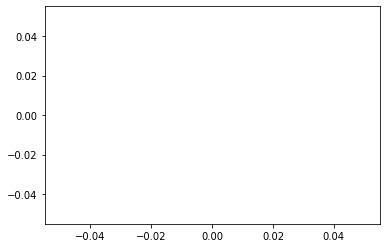

In [7]:
# def plot_within_pair_correlation(data, layer):

#     plt.clf()
#     is_within_pair = data['pair_type'] == 'med1-med2'
#     is_layer = data['layer'] == layer

#     within_pair_correlation_pre_post = data[(is_within_pair) & (is_layer)]

#     sns.lineplot(x = '|Epoch', y = 'correlation', hue='same_diff_condition', 
#                  data = within_pair_correlation_pre_post, palette = colors_dict)
#     plt.axhline(y = 0, c = 'k')
#     plt.ylim([-1.1, 1.1])
#     title = 'Within-Pair Correlation Over Time: ' + layer.capitalize() + ' Layer'
#     plt.title(title)
#     plt.legend(title = 'Condition', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
#     plt.xlabel('Epoch')
    
#     plt.savefig(results_dir + title + '.png', bbox_inches='tight')
#     plt.show()

    
# plot_within_pair_correlation(all_corr_df, 'hidden')
# plot_within_pair_correlation(all_corr_df, 'output')



# def plot_within_pair_correlation(data, layer, split = False):
#     plt.clf()
#     is_within_pair = data['pair_type'] == 'med1-med2'
#     is_layer = data['layer'] == layer

#     within_pair_correlation_pre_post = data[(is_within_pair) & (is_layer)]
#     display(within_pair_correlation_pre_post)
#     if split == True:
#         sns.lineplot(x = '|Epoch', y = 'correlation', hue='same_diff_condition', data = within_pair_correlation_pre_post,
#                      palette = colors_dict, units = '|Run', estimator = None, alpha = .2)
#     elif split == False:
#         sns.lineplot(x = '|Epoch', y = 'correlation', hue='same_diff_condition', data = within_pair_correlation_pre_post,
#                      palette = colors_dict)

#     plt.axhline(y = 0, c = 'k')
#     plt.ylim([-1.1, 1.1])
#     title = 'Within-Pair Correlation Over Time: ' + layer.capitalize() + ' Layer'
#     if split == True:
#         title = title + ' (runs)'
#     plt.legend(title = 'Condition', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
#     plt.xlabel('Epoch')
#     plt.title(title)
        
#     plt.savefig(results_dir + title + '.png', bbox_inches='tight')
#     plt.show()

    
# plot_within_pair_correlation(all_corr_df, 'hidden', split = False)
# plot_within_pair_correlation(all_corr_df, 'hidden', split = True)
# plot_within_pair_correlation(all_corr_df, 'output', split = False)
# plot_within_pair_correlation(all_corr_df, 'output', split = True)



In [8]:
def select_data(data):
    
    is_within_pair = data['pair_type'] == 'med1-med2'
    is_layer = data['layer'] == 'hidden'
    is_pre_or_post = data['|Epoch'].isin([data['|Epoch'].min(), data['|Epoch'].max()])

    within_pair_correlation_pre_post = data[(is_within_pair) & (is_layer) & (is_pre_or_post)]
    within_pair_correlation_pre_post
    
    return within_pair_correlation_pre_post

within_pair_correlation_pre_post = select_data(all_corr_df)




In [9]:
epoch_min = within_pair_correlation_pre_post['|Epoch'].min()
epoch_max = within_pair_correlation_pre_post['|Epoch'].max()

within_pair_correlation_pre_post['Time'] = within_pair_correlation_pre_post['|Epoch'].map({epoch_min:'Before', epoch_max:'After'})



<ipython-input-9-d625a41ee644>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within_pair_correlation_pre_post['Time'] = within_pair_correlation_pre_post['|Epoch'].map({epoch_min:'Before', epoch_max:'After'})


In [10]:
within_pair_correlation_pre_post.head()

,|Run,|Epoch,$CurrentTask,$CurrentTest,firstItem,secondItem,correlation,pair,pair_type,layer,same_diff_condition,Time
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.247057,med1-med2,med1-med2,hidden,Same,Before
81,0,19,TaskColorRecall,TestColorAll,med1,med2,-0.135267,med1-med2,med1-med2,hidden,Same,After
85,1,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.249758,med1-med2,med1-med2,hidden,Same,Before
165,1,19,TaskColorRecall,TestColorAll,med1,med2,-0.134349,med1-med2,med1-med2,hidden,Same,After
1,0,-1,TaskColorWOOsc,TestColorAll,med1,med2,0.246666,med1-med2,med1-med2,hidden,Different,Before


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


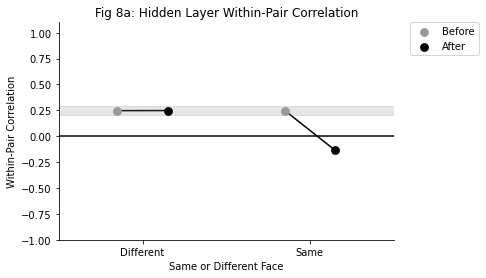

In [11]:
def pre_post_corr_parameter_shift(data, x_parameter, ribbon = False):
    plt.clf()

#     ax = sns.stripplot(x = parameter, y = 'correlation', hue = '|Epoch', 
#                  data = within_pair_correlation_pre_post, dodge = .3, alpha = .1, palette = 'Dark2_r')

    x = np.arange(-1, 2, .01)
    
    if ribbon == True:
        plt.fill_between(x, .21, .29, alpha  = .2, color = 'grey')
        
    ax = sns.pointplot(x = 'same_diff_condition', y = 'correlation', hue = 'Time', 
                  linestyles = '', dodge = .3, data = data, palette = palette_before_after)
    
    num_categories = len(data['same_diff_condition'].unique())
    for (x1, y1), (x2, y2) in zip(ax.lines[0].get_xydata(), ax.lines[num_categories + 1].get_xydata()):
        ax.plot([x1, x2], [y1, y2], color='black', zorder = 0)

    plt.axhline(0, color = 'k', linestyle = '-', zorder = 0)

    handles, labels = ax.get_legend_handles_labels()
    
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

#     l.get_texts()[0].set_text('before')
#     l.get_texts()[1].set_text('after')
    title = 'Fig 8a: Hidden Layer Within-Pair Correlation'
    plt.xlabel('Same or Different Face')
    plt.ylim([-1,1.1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlim([-.5, 1.5])
    
    plt.ylabel('Within-Pair Correlation')
    plt.title(title)
    plt.savefig(results_dir + title + '.png', bbox_inches='tight')
    plt.savefig(eps_dir + title + '.eps', bbox_inches='tight')
    plt.show()
    
    return ax
ax = pre_post_corr_parameter_shift(within_pair_correlation_pre_post, 'overlap', ribbon = True)

# Center of Mass analyses
<a id = 'c_o_m'></a>


### Center of Mass - # units apart
<a id = distance_apart></a>


In [ ]:
output_c_mass_df.head()

In [ ]:
def center_of_mass_dist(data_df, layer) :
    plt.clf()
    diff_data = data_df[data_df['stim'].isin(['med_diff'])]

    
    ax = sns.stripplot(x = 'same_diff_condition', y = 'c_o_m', hue = 'time', data = diff_data, alpha = .1, palette = palette_before_after)
    ax = sns.pointplot(x = 'same_diff_condition', y = 'c_o_m', hue = 'time', data = diff_data, ci = 95, linestyles = ' ', palette = palette_before_after)
    handles, labels = ax.get_legend_handles_labels()

    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    if layer == 'Color' :
        layer = 'Output'
    title = 'Reported Output Difference Between Pairmates' + layer + ' Layer'
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.title(title)
    plt.axhline(y = 0, linestyle = '-', color = 'k')
    plt.ylim(-10,10)
    plt.ylabel('Number of Units Apart')
    plt.xlabel('Condition')
    plt.savefig(unusedfigs_dir + title + '.png', bbox_inches='tight')
    plt.show()

center_of_mass_dist(output_c_mass_df, 'Color')



In [ ]:
output_c_mass_df

### error analysis
<a id = error_by_overlap></a>


In [ ]:
output_c_mass_df

In [ ]:
def plot_error_by_order(output_c_mass_df) :
    plt.clf()
    color_error_data = output_c_mass_df[output_c_mass_df['stim'].isin(['med1', 'med2'])]
    color_error_data = output_c_mass_df[output_c_mass_df['time'].isin(['After'])]

    ax = plt.axhline(0, ls = '-', color = 'gray')

    ax = sns.stripplot(x='same_diff_condition', y = 'rev_error', hue = 'order', palette = order_palette,
                        alpha = .1, data = color_error_data)
    handles, labels = ax.get_legend_handles_labels()

#     ax = sns.pointplot(x='same_diff_condition', y = 'rev_error', hue = 'order', data = color_error_data, alpha = .1, linestyles= ' ')
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    title = 'Output Error By Condition and Order'
    plt.title(title)
    plt.ylim([-10,10])
    plt.xlabel('Condition')
    plt.ylabel(' # units away from true value')
    plt.savefig(unusedfigs_dir + title + '.png', bbox_inches='tight')
    plt.show()

    
def plot_error(output_c_mass_df) :
    plt.clf()
    
    color_error_data = output_c_mass_df[output_c_mass_df['stim'].isin(['med1', 'med2'])]
    color_error_data = output_c_mass_df[output_c_mass_df['time'].isin(['After'])]

    ax = sns.stripplot(x='same_diff_condition', y = 'rev_error', alpha = .1, color = 'k', data = color_error_data)
    ax = plt.axhline(0, ls = '-', color = 'gray')

    ax = sns.pointplot(x='same_diff_condition', y = 'rev_error', color = 'k', data = color_error_data, linestyles= ' ')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    title = 'Output Error By Condition'
    plt.title(title)
    plt.xlabel('Condition')
    plt.ylim([-10,10])
    plt.ylabel(' # units away from true value')
    plt.savefig(unusedfigs_dir + title + '.png', bbox_inches='tight')
    plt.show()

plot_error_by_order(output_c_mass_df)
plot_error(output_c_mass_df)


In [ ]:
output_c_mass_df

In [ ]:
print('done with cross-pair analysis!')